# Implementation of Gradient Descent algorithm for Linear Regression

## Problem Statement

When petrol is pumped into tanks, hydrocarbons escape. To evaluate the effectiveness of pollution controls, experiments were performed. The quantity of hydrocarbons escaping was measured as a function of the following variables:

- The tank temperature
- The temperature of the petrol pumped in,
- The initial pressure in the tank, and 
- The pressure of the petrol pumped in.

## Dataset description

There are 32 rows of data. The data include 6 columns. 

- The first column is **the index**, 
- The second column is **the tank temperature** (in $^oF$), 
- The third column is **the petrol temperature** (in $^oF$), 
- The fourth column is **the initial tank pressure** (in $lbs\ in^{-2}$), 
- The fifth column is the **the petrol pressure** (in $lbs\ in^{-2}$), and 
- The last column is the **amount of escaping hydrocarbons** (in $grams$).

## Python coding

In [1]:
import numpy as np
import pandas as pd

### Importing the dataset

In [2]:
data = pd.read_csv('../Data/gas_tank_temp_pressure.csv', index_col=0)

In [3]:
data.head()

,Tank Temp,Petrol Temp,Tank Pr,Petrol Pr,Hydrocarbon Escaping
Index,,,,,
1,33,53,3.32,3.42,29
2,31,36,3.10,3.26,24
3,33,51,3.18,3.18,26
4,37,51,3.39,3.08,22
5,36,54,3.20,3.41,27


### Preprocessing the dataset

#### Taking features and target variables

In [4]:
X = data.iloc[:,:4].values
y = data.iloc[:,4].values

print(X.shape, y.shape)

X

(32, 4) (32,)


array([[33.  , 53.  ,  3.32,  3.42],
       [31.  , 36.  ,  3.1 ,  3.26],
       [33.  , 51.  ,  3.18,  3.18],
       [37.  , 51.  ,  3.39,  3.08],
       [36.  , 54.  ,  3.2 ,  3.41],
       [35.  , 35.  ,  3.03,  3.03],
       [59.  , 56.  ,  4.78,  4.57],
       [60.  , 60.  ,  4.72,  4.72],
       [59.  , 60.  ,  4.6 ,  4.41],
       [60.  , 60.  ,  4.53,  4.53],
       [34.  , 35.  ,  2.9 ,  2.95],
       [60.  , 59.  ,  4.4 ,  4.36],
       [60.  , 62.  ,  4.31,  4.42],
       [60.  , 36.  ,  4.27,  3.94],
       [62.  , 38.  ,  4.41,  3.49],
       [62.  , 61.  ,  4.39,  4.39],
       [90.  , 64.  ,  7.32,  6.7 ],
       [90.  , 60.  ,  7.32,  7.2 ],
       [92.  , 92.  ,  7.45,  7.45],
       [91.  , 92.  ,  7.27,  7.26],
       [61.  , 62.  ,  3.91,  4.08],
       [59.  , 42.  ,  3.75,  3.45],
       [88.  , 65.  ,  6.48,  5.8 ],
       [91.  , 89.  ,  6.7 ,  6.6 ],
       [63.  , 62.  ,  4.3 ,  4.3 ],
       [60.  , 61.  ,  4.02,  4.1 ],
       [60.  , 62.  ,  4.02,  3.89],
 

#### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)
X

array([[-1.29696753, -0.18768662, -0.77110143, -0.65977178],
       [-1.40111548, -1.28555246, -0.92501564, -0.77657785],
       [-1.29696753, -0.31684731, -0.86904684, -0.83498088],
       [-1.08867161, -0.31684731, -0.72212873, -0.90798468],
       [-1.14074559, -0.12310628, -0.85505464, -0.66707216],
       [-1.19281957, -1.3501328 , -0.97398834, -0.94448657],
       [ 0.05695591,  0.00605441,  0.25032921,  0.17977184],
       [ 0.10902989,  0.26437578,  0.20835261,  0.28927753],
       [ 0.05695591,  0.26437578,  0.12439941,  0.06296577],
       [ 0.10902989,  0.26437578,  0.07542671,  0.15057032],
       [-1.24489355, -1.3501328 , -1.06493765, -1.00288961],
       [ 0.10902989,  0.19979544, -0.0155226 ,  0.02646387],
       [ 0.10902989,  0.39353647, -0.0784875 ,  0.07026615],
       [ 0.10902989, -1.28555246, -0.1064719 , -0.28015206],
       [ 0.21317785, -1.15639177, -0.0085265 , -0.60866912],
       [ 0.21317785,  0.32895612, -0.0225187 ,  0.04836501],
       [ 1.67124925,  0.

In [6]:
np.mean(X, axis = 0)

array([ 0.00000000e+00,  2.77555756e-17,  1.66533454e-16, -3.05311332e-16])

In [7]:
np.std(X, axis = 0)

array([1., 1., 1., 1.])

#### Train-test split of the dataset

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, 
                                                    random_state = 40)

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24, 4) (24,) (8, 4) (8,)


### Implementing the cost-function

#### Equation of the cost function for linear regression (Mean Square Error Cost function)

$$ J(\hat{\Theta}) = \frac{1}{2m} \sum_{i=1}^{m} \left(y^{(i)} - \hat{y}^{(i)} \right)^2 = \frac{1}{2m} \sum_{i=1}^{m} \left(y^{(i)} - \hat{\theta}_0 - \sum_{j=1}^{k} \left( \hat{\theta}_j~x_j^{(i)}\right) \right)^2$$

In [13]:
# Here the cost function takes two arguments
    # A numpy 1-D array "y_true" for the true values of the target variable
    # A numpy 1-D array "y_pred" for the predicted values of the target variable
    
# It return a scalar "mean squared error cost function"

def mse_cost(y_true, y_pred):
    
    assert (y_true.shape[0] == y_pred.shape[0]),"Dimension Mismatch"
    
    m = y_true.shape[0]
    J = np.sum(np.square(y_true - y_pred))/(2*m)
    return (J)

### Implementing Gradient Descent Algorithm

#### Implementing the function to calculate the predicted output

In [10]:
def output_lin_reg(X, theta):
    
    return (X @ theta)

#### Equation of gradient descent update rule for linear regression

$$ \hat{\theta}_j(t+1) := \hat{\theta}_j(t) - \frac{\alpha}{m} \sum_{i=1}^{m} \left(\hat{\theta}_0(t) + \sum_{j=1}^{k} \left( \hat{\theta}_j(t)~x_j^{(i)}\right) - y^{(i)} \right) x_j^{(i)}~~; ~j=0,1,2,...,k ~~\&~~ x_0^{(i)} = 1~~for~~i = 1,2,...,m $$

$$ \hat{\theta}_j(t+1) := \hat{\theta}_j(t) - \frac{\alpha}{m} \sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}~~; ~j=0,1,2,...,k ~~\&~~ x_0^{(i)} = 1~~for~~i = 1,2,...,m $$

In [11]:
def grad_des_lin_reg(X, y, alpha = 0.01, it = 1000, tol = 0.0001):
    
    assert (X.shape[0] == y.shape[0]), "Dimension Mismatch"
    
    m = X.shape[0]   # Number of training samples
    X = np.c_[np.ones(m),X] # Inserting a column of all ones 
    k = X.shape[1]   # number of predictors (including the dummy predictor)
    
    np.random.seed(32)
    theta = np.random.randn(k) # Initializing the model parameters with random values
    
    costs = []
    count = 0
    
    for i in range(it):
        y_pred = output_lin_reg (X, theta)
        J = mse_cost(y, y_pred)
        costs.append(J)
        del_theta = (-1)*(alpha/m)*(X.T @ (y_pred - y))
        theta += del_theta
        if np.linalg.norm(del_theta) <= tol:
            break
        count += 1
    
    return theta, costs, count
    

### Running gradient descent algorithm

In [14]:
theta, costs, count = grad_des_lin_reg(X_train, y_train, alpha = 0.1, it = 8000, tol = 0.0001)

In [15]:
print("theta: {}, \n number of iterations = {}".format(theta, count))

theta: [31.37085478 -0.74317862  2.51919056 -1.8586919   9.50507313], 
 number of iterations = 6064


### Plotting cost vs iterations

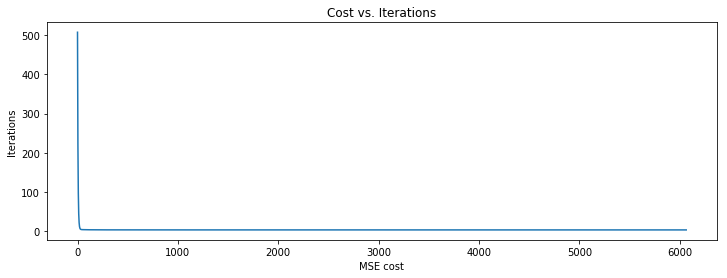

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (12,4))
plt.plot(costs)
plt.title("Cost vs. Iterations")
plt.xlabel("MSE cost")
plt.ylabel("Iterations")
plt.show()

### Predicting the model output on test dataset

In [18]:
y_pred_test = output_lin_reg(np.c_[np.ones(X_test.shape[0]),X_test], theta)

In [19]:
pd.DataFrame(np.c_[y_test, y_pred_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,26.0,25.215271
1,23.0,25.586307
2,46.0,46.985116
3,34.0,33.792957
4,40.0,44.166344
5,33.0,29.794389
6,31.0,39.253580
7,36.0,32.073542


In [20]:
mse_cost(y_test, y_pred_test)

7.468195273772615

### Solving Linear Regression by Normal Equation

In [21]:
X_t = np.c_[np.ones(X_train.shape[0]), X_train]

theta_normal = (np.linalg.pinv(X_t.T @ X_t))@X_t.T@y_train

In [22]:
theta_normal

array([31.37186038, -0.72036499,  2.49219991, -1.9666942 ,  9.61630533])

In [23]:
theta

array([31.37085478, -0.74317862,  2.51919056, -1.8586919 ,  9.50507313])

In [24]:
y_pred_test = output_lin_reg(np.c_[np.ones(X_test.shape[0]),X_test], theta_normal)

In [25]:
pd.DataFrame(np.c_[y_test, y_pred_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,26.0,25.196222
1,23.0,25.604835
2,46.0,47.031718
3,34.0,33.803820
4,40.0,44.165372
5,33.0,29.782427
6,31.0,39.238875
7,36.0,32.076262


In [26]:
mse_cost(y_test, y_pred_test)

7.469502608524963

### Solving Linear Regression by in-built function python library Scikit-Learn (sklearn)

In [27]:
from sklearn.linear_model import LinearRegression 

In [28]:
model = LinearRegression().fit(X_train, y_train)

In [29]:
model.coef_

array([-0.72036499,  2.49219991, -1.9666942 ,  9.61630533])

In [30]:
model.intercept_

31.371860377057633

In [31]:
y_pred_test = model.predict(X_test)

In [32]:
pd.DataFrame(np.c_[y_test, y_pred_test], columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,26.0,25.196222
1,23.0,25.604835
2,46.0,47.031718
3,34.0,33.803820
4,40.0,44.165372
5,33.0,29.782427
6,31.0,39.238875
7,36.0,32.076262


In [33]:
mse_cost(y_test, y_pred_test)

7.469502608524853